# Trying gradient boosting algorithm

In [12]:
# Import our libraries 

# Pandas and numpy for data wrangling
import pandas as pd
import numpy as np

# Seaborn / matplotlib for visualization 
import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
%matplotlib inline

# Helper function to split our data
from sklearn.model_selection import train_test_split, GridSearchCV

# Helper fuctions to evaluate our model.
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score, f1_score

# Helper function to split our data
from sklearn.model_selection import train_test_split

# Helper fuctions to evaluate our model.
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score, f1_score

# Import our Decision Tree
from sklearn.tree import DecisionTreeClassifier 

# Import our Random Forest 
from sklearn.ensemble import RandomForestClassifier

# Import the trees from sklearn
from sklearn import tree

# Helper functions to visualize our trees
from sklearn.tree import plot_tree, export_text

#tree regression
from sklearn.ensemble import RandomForestRegressor
# imbalanced-learn library
from imblearn.over_sampling import RandomOverSampler

from sklearn.tree import plot_tree, export_text
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [13]:
df = pd.read_csv('../texas_dataset/texas_get_dummies_encoded_value_dec_3.csv')

df.head(5)

,age_intake_months,stay_length,intake_type_owner_surrender,intake_type_stray,intake_condition_aged,intake_condition_injured,intake_condition_neonatal,intake_condition_normal,intake_condition_nursing,intake_condition_pregnant,...,coatcolor_black_n_white,coatcolor_blue,coatcolor_brown,coatcolor_calico_or_calico_mix,coatcolor_orange,coatcolor_torbie_or_torbie_mix,coatcolor_tortie_or_tortie_mix,coatcolor_white_mix,coatpattern_solid,coatpattern_tabby
0,1,31,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,36,3,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,68,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1,24,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
4,1,30,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [14]:
print(df.duplicated().sum())

8994


In [15]:
df= df.drop_duplicates(keep='first')

In [16]:
print(df.duplicated().sum())

0


In [17]:
df.shape

(17085, 26)

In [18]:
df.isnull().sum()

age_intake_months                 0
stay_length                       0
intake_type_owner_surrender       0
intake_type_stray                 0
intake_condition_aged             0
intake_condition_injured          0
intake_condition_neonatal         0
intake_condition_normal           0
intake_condition_nursing          0
intake_condition_pregnant         0
intake_condition_sick             0
sex_intake_female                 0
sex_intake_male                   0
breed_domestic_shorthair          0
breed_domestic_shorthair_mix      0
coatcolor_black                   0
coatcolor_black_n_white           0
coatcolor_blue                    0
coatcolor_brown                   0
coatcolor_calico_or_calico_mix    0
coatcolor_orange                  0
coatcolor_torbie_or_torbie_mix    0
coatcolor_tortie_or_tortie_mix    0
coatcolor_white_mix               0
coatpattern_solid                 0
coatpattern_tabby                 0
dtype: int64

## ⬇︎⬇︎ GradientBoostingRegressor simple  ⬇︎⬇︎

In [19]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Select relevant columns
selected_columns = ['age_intake_months', 'stay_length',
                    'intake_type_owner_surrender', 
                    'intake_type_stray',
                    'intake_condition_aged',
                    'intake_condition_injured',
                    'intake_condition_neonatal',
                    'intake_condition_normal',
                    'intake_condition_nursing',
                    'intake_condition_pregnant',
                    'intake_condition_sick',
                    'sex_intake_female',
                    'sex_intake_male',
                    'breed_domestic_shorthair',
                    'breed_domestic_shorthair_mix',
                    'coatcolor_black',
                    'coatcolor_black_n_white',
                    'coatcolor_blue',
                    'coatcolor_brown',
                    'coatcolor_calico_or_calico_mix',
                    'coatcolor_orange',
                    'coatcolor_torbie_or_torbie_mix',
                    'coatcolor_tortie_or_tortie_mix',
                    'coatcolor_white_mix',
                    'coatpattern_solid',
                    'coatpattern_tabby']

df_selected = df[selected_columns]

# Drop rows with missing values
df_selected = df_selected.dropna()

# Split the data into features (X) and target variable (y)
X = df_selected.drop('stay_length', axis=1)
y = df_selected['stay_length']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model to the training data
gb_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = np.round(gb_model.predict(X_test))

mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

rmse = np.sqrt(mse)  # Calculate RMSE
print(f'Root Mean Squared Error: {rmse}')

average_days_staying = y_test.mean()
print(f'Average Days Staying: {average_days_staying}')

if rmse < average_days_staying:
    print("RMSE is less than Average Days Staying.")
else:
    print("RMSE is greater than or equal to Average Days Staying.")
    
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

r2 = r2_score(y_true=y_test, y_pred=predictions)
print("R-squared Score: %f" % r2)

Mean Squared Error: 499.66344746853963
Root Mean Squared Error: 22.353152964817728
Average Days Staying: 32.247585601404744
RMSE is less than Average Days Staying.
Mean Absolute Error: 17.640035118525024
R-squared Score: 0.278395


In [20]:
feature_importance = pd.Series(gb_model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False, inplace=True)
print(feature_importance)

age_intake_months                 0.847322
intake_condition_normal           0.034542
intake_type_owner_surrender       0.031185
intake_type_stray                 0.017724
breed_domestic_shorthair          0.011614
intake_condition_nursing          0.009528
breed_domestic_shorthair_mix      0.009206
coatcolor_brown                   0.007624
coatpattern_tabby                 0.005838
coatcolor_black                   0.005390
sex_intake_male                   0.003201
coatpattern_solid                 0.003009
coatcolor_black_n_white           0.002613
sex_intake_female                 0.002109
coatcolor_white_mix               0.001637
coatcolor_tortie_or_tortie_mix    0.001468
intake_condition_injured          0.001384
coatcolor_calico_or_calico_mix    0.001108
coatcolor_blue                    0.000791
intake_condition_sick             0.000776
intake_condition_neonatal         0.000763
intake_condition_pregnant         0.000584
coatcolor_torbie_or_torbie_mix    0.000480
intake_cond

In [46]:
# Calculate residuals
residuals = y_test - predictions

# Add residuals to the DataFrame for further analysis if needed
df_residuals = pd.DataFrame({'Actual': y_test, 'Predicted': predictions, 'Residuals': residuals})

# Display the DataFrame with residuals
# print(df_residuals)

df_residuals.head(50)

,Actual,Predicted,Residuals
420,15,13.0,2.0
1986,21,24.0,-3.0
417,14,19.0,-5.0
52,41,36.0,5.0
1824,50,22.0,28.0
1931,28,27.0,1.0
823,50,28.0,22.0
748,27,28.0,-1.0
3028,21,23.0,-2.0
505,9,26.0,-17.0


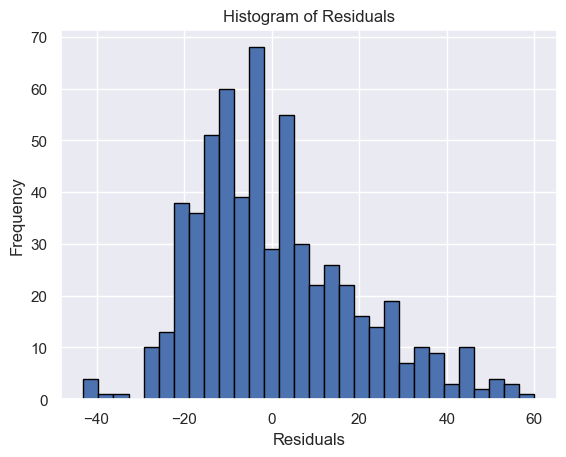

Average of Residuals: 0.7164179104477612
Average of Absolute Residuals: 14.172470978441128


In [47]:
import matplotlib.pyplot as plt

# ... (previous code)

# Calculate residuals
residuals = y_test - predictions

# Plot histogram of residuals
plt.hist(residuals, bins=30, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Calculate and print the average of residuals
average_residuals = residuals.mean()
print(f'Average of Residuals: {average_residuals}')


# Calculate absolute residuals
absolute_residuals = np.abs(residuals)

# Calculate and print the average of absolute residuals
average_absolute_residuals = absolute_residuals.mean()
print(f'Average of Absolute Residuals: {average_absolute_residuals}')


In [48]:
df_residuals.head()

,Actual,Predicted,Residuals
420,15,13.0,2.0
1986,21,24.0,-3.0
417,14,19.0,-5.0
52,41,36.0,5.0
1824,50,22.0,28.0


In [49]:
# Assuming df_residuals_sorted is your sorted DataFrame with 'Residuals' column
zero_residuals = df_residuals[df_residuals['Residuals'] == 0]

# Display the rows where residuals are exactly 0
zero_residuals.head(50)

,Actual,Predicted,Residuals
197,20,20.0,0.0
1825,26,26.0,0.0
2169,22,22.0,0.0
1319,51,51.0,0.0
994,46,46.0,0.0
1396,30,30.0,0.0
1608,48,48.0,0.0
1164,16,16.0,0.0
112,20,20.0,0.0


## ⬆︎⬆︎ GradientBoostingRegressor simple Mean Absolute Error: 14.172470978441128 & R-squared Score: 0.176236  ⬆︎⬆︎

## ⬇︎⬇︎ GradientBoostingRegressor with GridSearchCV  ⬇︎⬇︎

In [11]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Assuming df is your dataframe
selected_columns = ['intake_age', 'simplified_color_black', 'simplified_color_black_n_white', 
                    'simplified_color_brn_tabby', 'simplified_color_gray', 
                    'simplified_color_gray_n_white', 'simplified_color_gray_tabby', 'simplified_color_mix',
                    'simplified_color_org_tabby', 'simplified_color_tortie', 
                    'simplified_sex_male', 'simplified_condition_healthy', 
                    'simplified_condition_ill', 'simplified_type_owner_surrender', 
                    'simplified_type_stray', 'simplified_breed_domestic_med_or_long_hair', 
                    'simplified_breed_domestic_short_hair', 'simplified_size_kittn', 'simplified_size_small',
                    'days_in_shelter']
df_selected = df[selected_columns]

# Drop rows with missing values
df_selected = df_selected.dropna()

# Split the data into features (X) and target variable (y)
X = df_selected.drop('days_in_shelter', axis=1)
y = df_selected['days_in_shelter']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # # Use RandomOverSampler to handle imbalanced data
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(GradientBoostingRegressor(), param_grid, cv=5)
grid_search.fit(X_resampled, y_resampled)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model
gb_model = grid_search.best_estimator_

# Now let's evaluate our model on the test set
y_pred = np.round(gb_model.predict(X_test))

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

rmse = np.sqrt(mse)  # Calculate RMSE
print(f'Root Mean Squared Error: {rmse}')

average_days_staying = y_test.mean()
print(f'Average Days Staying: {average_days_staying}')

if rmse < average_days_staying:
    print("RMSE is less than Average Days Staying.")
else:
    print("RMSE is greater than or equal to Average Days Staying.")
    
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')
r2 = r2_score(y_true=y_test, y_pred=y_pred)
print("R-squared Score: %f" % r2)

KeyError: "None of [Index(['intake_age', 'simplified_color_black',\n       'simplified_color_black_n_white', 'simplified_color_brn_tabby',\n       'simplified_color_gray', 'simplified_color_gray_n_white',\n       'simplified_color_gray_tabby', 'simplified_color_mix',\n       'simplified_color_org_tabby', 'simplified_color_tortie',\n       'simplified_sex_male', 'simplified_condition_healthy',\n       'simplified_condition_ill', 'simplified_type_owner_surrender',\n       'simplified_type_stray', 'simplified_breed_domestic_med_or_long_hair',\n       'simplified_breed_domestic_short_hair', 'simplified_size_kittn',\n       'simplified_size_small', 'days_in_shelter'],\n      dtype='object')] are in the [columns]"

In [ ]:
feature_importance = pd.Series(gb_model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False, inplace=True)
print(feature_importance)

In [55]:
# Calculate residuals
residuals = y_test - y_pred

# Add residuals to the DataFrame for further analysis if needed
df_residuals = pd.DataFrame({'Actual': y_test, 'Predicted': predictions, 'Residuals': residuals})

# Display the DataFrame with residuals
# print(df_residuals)

df_residuals.head(50)

,Actual,Predicted,Residuals
420,15,13.0,1.0
1986,21,24.0,-5.0
417,14,19.0,-10.0
52,41,36.0,4.0
1824,50,22.0,43.0
1931,28,27.0,7.0
823,50,28.0,-13.0
748,27,28.0,-37.0
3028,21,23.0,8.0
505,9,26.0,-17.0


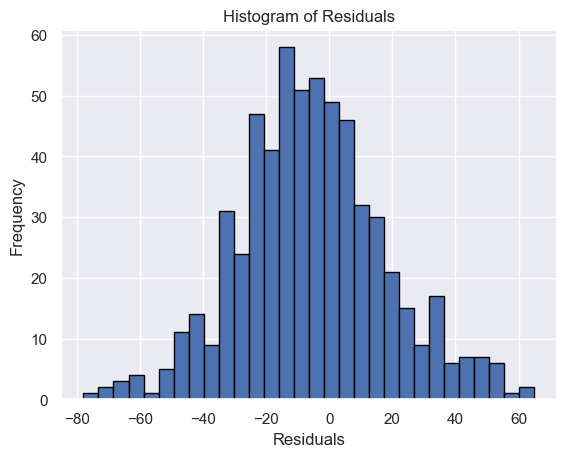

Average of Residuals: -5.597014925373134
Average of Absolute Residuals: 19.079601990049753


In [52]:
import matplotlib.pyplot as plt

# ... (previous code)

# Calculate residuals
residuals = y_test - y_pred

# Plot histogram of residuals
plt.hist(residuals, bins=30, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Calculate and print the average of residuals
average_residuals = residuals.mean()
print(f'Average of Residuals: {average_residuals}')


# Calculate absolute residuals
absolute_residuals = np.abs(residuals)

# Calculate and print the average of absolute residuals
average_absolute_residuals = absolute_residuals.mean()
print(f'Average of Absolute Residuals: {average_absolute_residuals}')


In [53]:
# Assuming df_residuals_sorted is your sorted DataFrame with 'Residuals' column
zero_residuals = df_residuals[df_residuals['Residuals'] == 0]

# Display the rows where residuals are exactly 0
zero_residuals.head(50)

,Actual,Predicted,Residuals
197,20,20.0,0.0
1825,26,26.0,0.0
2169,22,22.0,0.0
1319,51,51.0,0.0
994,46,46.0,0.0
1396,30,30.0,0.0
1608,48,48.0,0.0
1164,16,16.0,0.0
112,20,20.0,0.0


## ⬆︎⬆︎ GradientBoostingRegressor w GridSearchCV (R2 : 0.088214 )  ⬆︎⬆︎

## ⬇︎⬇︎ RandomForestRegressor no-sampling  ⬇︎⬇︎

In [32]:
independent_variables = [ 'simplified_color_encoded', 'simplified_sex_encoded','intake_age', 
                    'simplified_condition_encoded', 'simplified_type_encoded', 
                    'simplified_breed_encoded', 'simplified_size_encoded']
dependent_variable = 'days_in_shelter'

In [33]:

# Specify the column containing the values you want to check for uniqueness

X = df[independent_variables]
y = df[dependent_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model
best_model = grid_search.best_estimator_

# Now let's evaluate our model on the test set
y_pred = np.round(best_model.predict(X_test)) # 80, 80.2 (80) 81

# Evaluate the regression model
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
print("Mean Squared Error: %f" % mse)

r2 = r2_score(y_true=y_test, y_pred=y_pred)
print("R-squared Score: %f" % r2)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Mean Squared Error: 406.494689
R-squared Score: 0.173312


In [34]:
feature_importance = pd.Series(best_model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False, inplace=True)
print(feature_importance)

simplified_condition_encoded    0.469175
simplified_type_encoded         0.151076
intake_age                      0.150905
simplified_color_encoded        0.090965
simplified_sex_encoded          0.055683
simplified_size_encoded         0.049444
simplified_breed_encoded        0.032751
dtype: float64


## ⬆︎⬆︎ RandomForestRegressor w GridSearchCV (R2 : 0.173312 )  ⬆︎⬆︎

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(regression_forest_model.estimators_[0], feature_names=independent_variables, filled=True)
plt.title('Tree 1')
plt.show()

In [ ]:
y_pred

In [ ]:
print(y_test.tolist())

In [ ]:
# Create a DataFrame with actual and predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Display the DataFrame
print(comparison_df)

# # You can also save the DataFrame to a CSV file if you want to analyze it further
# comparison_df.to_csv('comparison_results.csv', index=False)

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Print the entire DataFrame
print(comparison_df)
